In [61]:
%matplotlib inline
import math
import random

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

sns.set(style="ticks", color_codes=True)

In [62]:
data = pd.read_csv("./data/NYCnumber.csv", sep=',')

In [81]:
num_classes = 10

b = data['31'].max() / num_classes

data['target'] = [int(min(num_classes-1,math.floor(x / b))) for x in data['31']]

In [82]:
print data.head()

        1       3       4    17    19    24    27    28           29  \
0  1282.0  2835.0  3463.0   7.3  31.5  16.2  52.2   7.7  103446100.0   
1  1491.0  2015.0  1262.0   5.3  17.4   2.2  61.1   6.1  150492800.0   
2   920.0  2455.0  2569.0   5.3   8.1  10.9  45.7   9.2   93610300.0   
3  1126.0  3167.0  1676.0   2.7  38.0  20.1  52.2  19.4   36375100.0   
4   601.0  3961.0  3578.0  34.0  24.7   4.6  42.5  12.6  110563800.0   

         31  target  
0  410400.0       4  
1  354100.0       3  
2  418300.0       4  
3  360000.0       3  
4  370800.0       3  


In [83]:
# convert housing data to numpy format
data_array = data.as_matrix().astype(float)
# split data into feature and target sets
X = data_array[:, :-1]
y = data_array[:, -1]
# normalize the data per feature by dividing by the maximum value in each column
X = X / X.max(axis=0)

y = np_utils.to_categorical(y, num_classes)

In [84]:
# model hyperparameters
batch_size = 256
nb_epoch = 200

num_hidden_1 = 512
num_hidden_2 = 512
num_hidden_3 = 512
dropout = 0.25

In [85]:
model = Sequential()

model.add(Dense(output_dim=num_hidden_1, input_dim=X.shape[1]))
model.add(Activation("relu"))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_2))
model.add(Activation("relu"))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_3))
model.add(Activation("relu"))
model.add(Dropout(dropout))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# save out model each time it performs better than previous epochs
checkpoint_name = "-model_keras-classification.hdf5"
checkpointer = ModelCheckpoint(checkpoint_name, verbose=0, save_best_only=True)

# categorical crossentropy error for classification problem
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

# fit model using a 25% validation split (keras will automatically split the data into training and validation sets)
history = model.fit(X, y, validation_split=0.25, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, callbacks=[checkpointer])

10
Train on 1283 samples, validate on 428 samples
Epoch 1/200
0s - loss: 2.2361 - acc: 0.1972 - val_loss: 2.1122 - val_acc: 0.2944
Epoch 2/200
0s - loss: 2.1011 - acc: 0.2440 - val_loss: 1.9834 - val_acc: 0.2944
Epoch 3/200
0s - loss: 2.0335 - acc: 0.2455 - val_loss: 1.9776 - val_acc: 0.3061
Epoch 4/200
0s - loss: 1.9970 - acc: 0.2860 - val_loss: 1.8622 - val_acc: 0.2944
Epoch 5/200
0s - loss: 1.9540 - acc: 0.2783 - val_loss: 1.9111 - val_acc: 0.2804
Epoch 6/200
0s - loss: 1.9103 - acc: 0.3336 - val_loss: 1.8319 - val_acc: 0.3014
Epoch 7/200
0s - loss: 1.8440 - acc: 0.3203 - val_loss: 1.7449 - val_acc: 0.2991
Epoch 8/200
0s - loss: 1.7978 - acc: 0.3422 - val_loss: 1.7179 - val_acc: 0.2991
Epoch 9/200
0s - loss: 1.7532 - acc: 0.3429 - val_loss: 1.6790 - val_acc: 0.3575
Epoch 10/200
0s - loss: 1.6946 - acc: 0.3601 - val_loss: 1.6910 - val_acc: 0.2967
Epoch 11/200
0s - loss: 1.6530 - acc: 0.3687 - val_loss: 1.8019 - val_acc: 0.2173
Epoch 12/200
0s - loss: 1.6246 - acc: 0.3835 - val_loss: 

In [86]:
# list all data in history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


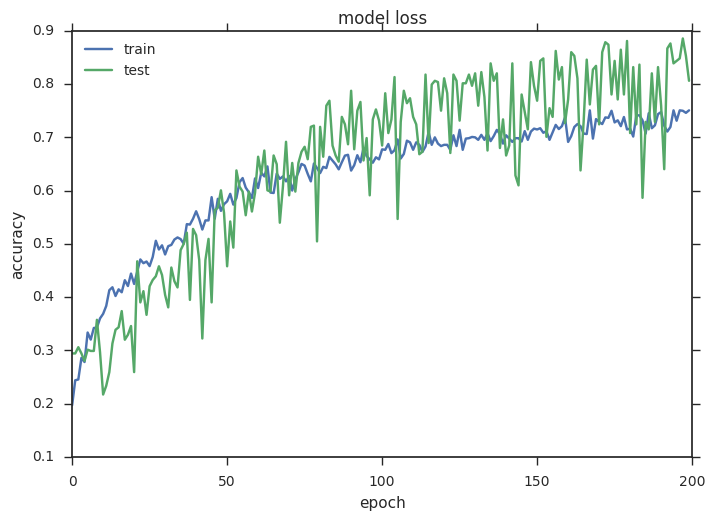

In [87]:
# plot history of loss in training and validation data
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

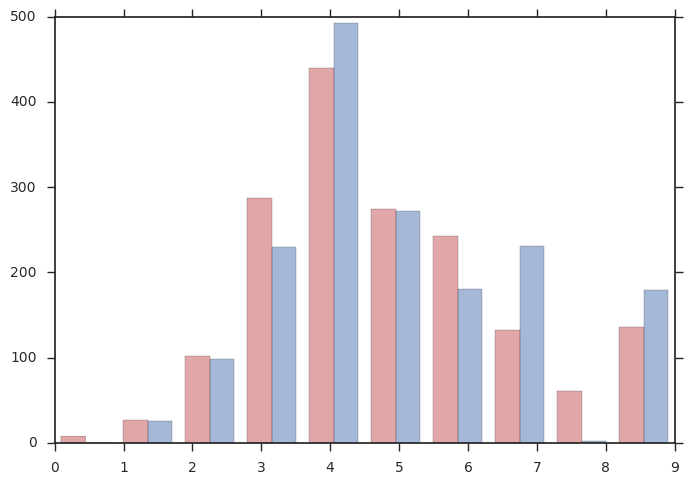

In [88]:
_y = model.predict(X)
plot = plt.hist([np.argmax(y, axis=1), np.argmax(_y, axis=1)], color=['r','b'], alpha=0.5)